In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 一、线性回归
概括地说，线性模型就是对输入特征加权求和，再加上一个我们称为偏置项（也称为截距项）的常数，以此进行预测，如公式
$y* = θ_0 + θ_1x_1 + θ_2x_2 + … + θ_nx_n$

* y* 是预测值
* n 是特征数量
* $x_i$ 是第i个特征值
* θj是第j个模型参数（包括偏差项θ0和特征权重θ1，θ2，…，θn）。

线性回归的成本函数是MSE

### 1、标准方程

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


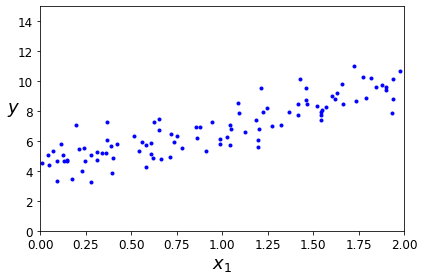

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


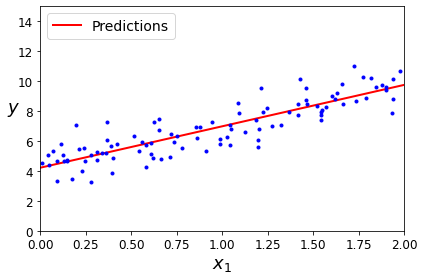

In [13]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

### 2、使用Scikit-Learn执行线性回归

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

偏差项（intercept_）与特征权重（coef_）

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 二、多项式回归
基于一个简单的二次方程式（注：二次方程的形式为$y=ax^2+bx+c$）

In [19]:
# 生成一些非线性数据
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


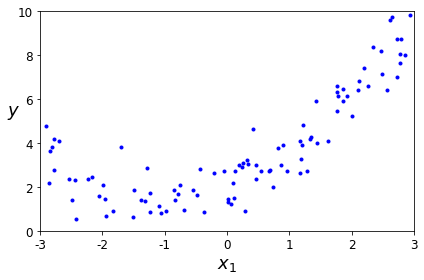

In [20]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)  # 将原有的X转换为一个新的二维数组X_，该二维数组包含新生成的二次项数据（x2）和原有的一次项数据（x）。
X[0], X_poly[0]

(array([1.76886782]), array([1.76886782, 3.12889337]))

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

模型估算为 $y' = 0.50x^2 + 1.05x + 2.0$， 实际原始函数为 $y = 0.50x^2 + 1.0x + 2.0$

Saving figure quadratic_predictions_plot


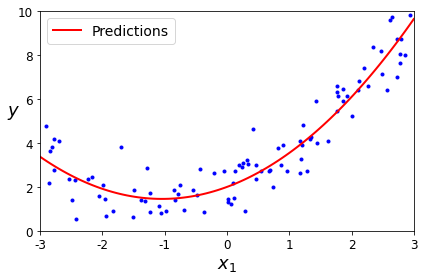

In [26]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

> 请注意，当存在多个特征时，多项式回归能够找到特征之间的关系（这是普通线性回归模型无法做到的）。PolynomialFeatures还可以将特征的所有组合添加到给定的多项式阶数。例如，如果有两个特征a和b，则degree=3的PolynomialFeatures不仅会添加特征a2、a3、b2和b3，还会添加组合ab、a2b和ab2。

Saving figure high_degree_polynomials_plot


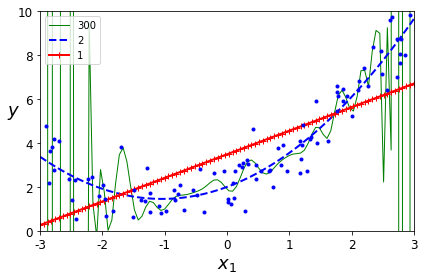

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

如果执行高阶多项式回归，与普通线性回归相比，拟合数据可能会更好。例如，上图将300阶多项式模型应用于先前的训练数据，将结果与纯线性模型和二次模型（二次多项式）进行比较。请注意300阶多项式模型是如何摆动以尽可能接近训练实例的。这种高阶多项式回归模型严重过拟合训练数据，而线性模型则欠拟合。在这种情况下，最能泛化的模型是二次模型，因为数据是使用二次模型生成的。

### 模型评估

模型搭建完成后，还需要对模型进行评估，这里主要以3个值作为评判标准：R-squared（即统计学中的R2）、Adj.R-squared（即Adjusted R2）、P值。其中R-squared和Adj.R-squared用来衡量线性拟合的优劣，P值用来衡量特征变量的显著性。

在实战应用中，我们只需要记住这两条规则：R-squared和Adj.R-squared的取值范围为0～1，它们的值越接近1，则模型的拟合程度越高；P值在本质上是个概率值，其取值范围也为0～1，P值越接近0，则特征变量的显著性越高，即该特征变量真的和目标变量具有相关性。

In [28]:
import statsmodels.api as sm
X2 = sm.add_constant(X_poly)  # 传入的是含有二次项的x
est = sm.OLS(y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     324.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.06e-43
Time:                        15:20:43   Log-Likelihood:                -130.41
No. Observations:                 100   AIC:                             266.8
Df Residuals:                      97   BIC:                             274.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9996      0.133     15.000      0.000       1.735       2.264
x1             1.0463      0.053     19.840      0.000       0.942       1.151
x2             0.5015      0.033     15.281      0.000       0.436       0.567
==============================================================================
Omnibus:                        3.466   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.030
Skew:                          -0.253   Prob(JB):                        0.220
Kurtosis:                       3.686   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 三、逻辑回归
一些回归算法也可用于分类。逻辑回归（Logistic回归，也称为Logit回归）被广泛用于估算一个实例属于某个特定类别的概率。（比如，这封电子邮件属于垃圾邮件的概率是多少？）如果预估概率超过50%，则模型预测该实例属于该类别（称为正类，标记为“1”），反之，则预测不是（称为负类，标记为“0”）。这样它就成了一个二元分类器。

这里我们用鸢尾植物数据集来说明逻辑回归。这是一个非常著名的数据集，共有150朵鸢尾花，分别来自三个不同品种（山鸢尾、变色鸢尾和维吉尼亚鸢尾），数据里包含花的萼片以及花瓣的长度和宽度

In [29]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
# 试试仅基于花瓣宽度这一个特征，创建一个分类器来检测维吉尼亚鸢尾花
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

/var/folders/kq/w31zf4v5575bbjvlkldg2fn80000gn/T/ipykernel_6558/1972769225.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [39]:
# 训练一个逻辑回归模型：
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

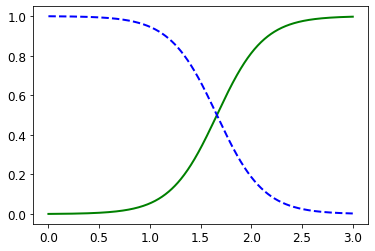

In [40]:
# 来看看花瓣宽度在0到3cm之间的鸢尾花，模型估算出的概率
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/Users/dayao/opt/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


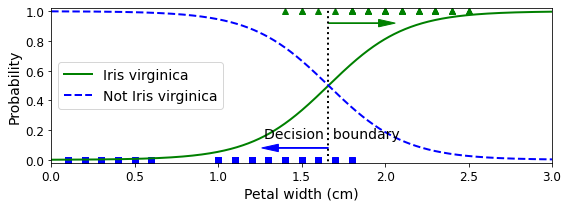

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [42]:
decision_boundary

array([1.66066066])

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax回归
逻辑回归模型经过推广，可以直接支持多个类别，而不需要训练并组合多个二元分类器（如第3章所述）。这就是Softmax回归，或者叫作多元逻辑回归。